In [26]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.getcwd()

'C:\\git\\image_recognise\\cnipa'

In [4]:
os.chdir(r'C:\git\image_recognise\cnipa\data')

In [5]:
file='1558405324413-4550.jpg'

In [6]:
os.path.exists(file)

True

In [31]:
c_img = cv2.imread('1558405379191-5804.jpg')

In [25]:
c_img.shape

(20, 90, 3)

TypeError: Image data cannot be converted to float

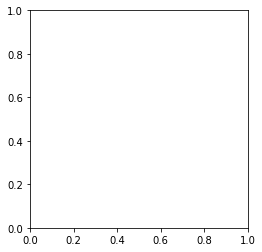

In [23]:
plt.imshow(c_img)

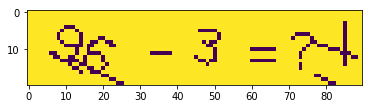

In [112]:
g_img = cv2.cvtColor(c_img,cv2.COLOR_BGR2GRAY)
thresh,new_img = cv2.threshold(g_img,160,255,0)
plt.imshow(new_img)

In [113]:
h,w=new_img.shape

In [82]:
h

20

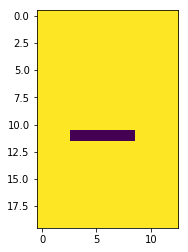

In [114]:
plt.imshow(new_img[:,30:43]) # 加号

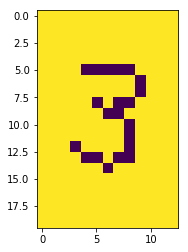

In [115]:
plt.imshow(new_img[:,42:55]) # 第二个数字

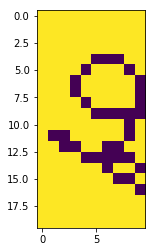

In [116]:
plt.imshow(new_img[:,5:15]) # 第一个数字

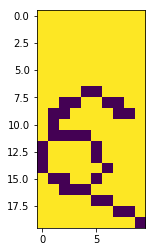

In [117]:
plt.imshow(new_img[:,15:25]) # 第一个数字

In [ ]:
new_img.imwrite('')

In [4]:
def resize_img(img,size_tuple):
    img_resize=cv2.resize(img,size_tuple) # 返回的就是灰度
#     print(img_resize.shape)
#     img1=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
    thresh,img1=cv2.threshold(img_resize,160,255,0)
    return img1

In [33]:
def split_image(filename):
#     print(filename)
    
    c_img = cv2.imread(filename)
#     print(c_img.shape)
#     dirname=os.path.dirname(filename)
    
#     name=os.path.basename(filename)
    first_name=filename.split('.')[0]
    
    if c_img is None:
        return None
    
    g_img = cv2.cvtColor(c_img,cv2.COLOR_BGR2GRAY)

    thresh,new_img = cv2.threshold(g_img,160,255,0)
    first=new_img[:,0:25]
    first=vertical(first)
    
    # 切开
    if len(first)==1:
        l = first[0][0]
        r = first[0][1]
        first[0]=(l,int((r-l)/2+l))
        first.append((int((r-l)/2+l),r))
        
    elif len(first)>2:
        for idx, it in enumerate(first.copy()):
            if it[1] - it[0] < 4:
                first.pop(idx)
    

    if len(first)==1:
        position0=first[0][0]
        position1=first[0][1]
        if position1-position0>=13:
            first[0]=(position0,int((position1-position0)/2+position0))
            first.append((int((position1-position0)/2+position0),position1))
      
    if len(first)==1:
        print(filename)
        return None
    
    one=resize_img(new_img[:,first[0][0]:first[0][1]],(13,20))
    two=resize_img(new_img[:,first[1][0]:first[1][1]],(13,20))
    three=resize_img(new_img[:,30:43],(13,20))
    four=resize_img(new_img[:,42:55],(13,20))
    
#     return one,two,three,four
    cv2.imwrite('train1/{}-{}.jpg'.format(first_name,1),one)
    cv2.imwrite('train1/{}-{}.jpg'.format(first_name,2),two)
    cv2.imwrite('train1/{}-{}.jpg'.format(first_name,3),three)
    cv2.imwrite('train1/{}-{}.jpg'.format(first_name,4),four)

In [41]:
img_1 = split_image(file)

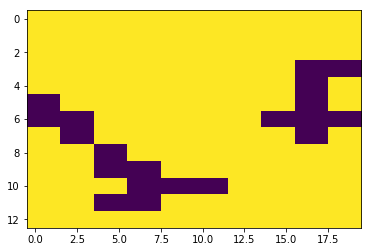

In [46]:
plt.imshow(img_1[0])

In [121]:
file='1558405591747-7096.jpg'
c_img=cv2.imread(file)
g_img = cv2.cvtColor(c_img,cv2.COLOR_BGR2GRAY)
thresh,new_img = cv2.threshold(g_img,160,255,0)

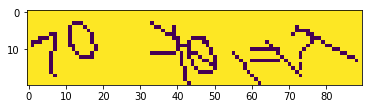

In [91]:
plt.imshow(new_img)

In [11]:
file='1558405324413-4550.jpg'
imgx=split_image(file)
# print(imgx)
for idx,img in enumerate(imgx):
    if img is None:
        continue
    plt.subplot(1,len(imgx),idx+1)
    plt.imshow(img)

TypeError: 'NoneType' object is not iterable

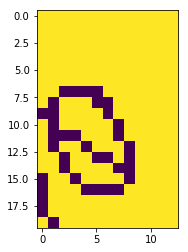

In [110]:
plt.imshow(imgx[3])

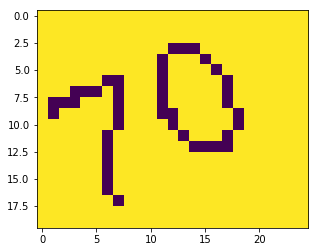

In [73]:
cut_im = new_img[:,:25]
plt.imshow(cut_im)

In [74]:
cut_im.shape

(20, 25)

In [34]:
def vertical(img):
    """传入二值化后的图片进行垂直投影"""
#     file = '697.jpg'
#     img = Image.open(file).convert('1')
#     pixdata = img.load()
    h,w = img.shape
    ver_list = []
    # 开始投影
    for x in range(w):
        black = 0
        for y in range(h):
            if img[y,x] == 0:
                black += 1
        ver_list.append(black)
    # 判断边界
    l,r = 0,0
    flag = False
    cuts = []
    for i,count in enumerate(ver_list):
        # 阈值这里为0
        if flag is False and count > 0:
            l = i
            flag = True
        if flag and count == 0:
            r = i+1
            flag = False
            cuts.append((l,r))
            
    if len(cuts)==0:
        cuts=[(l,w)]
#     print(cuts)

    # 保存切割的
#     for idx,item in enumerate(cuts):
#         plt.subplot(1,len(cuts),idx+1)
#         plt.imshow(img[:,item[0]:item[1]])
        
#         img_i = img.crop((item[0],0,item[1],h))
#         cv2.imwrite('cut_img{}.jpg'.format(idx),img[:,item[0]:item[1]])

    return cuts

[(1, 9), (11, 20)]


[(1, 9), (11, 20)]

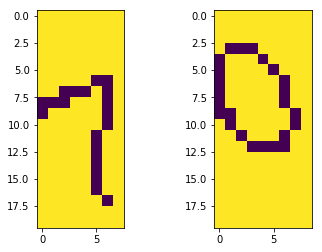

In [76]:
vertical(cut_im)

In [27]:
parent_root = r'C:\git\image_recognise\cnipa\error'
os.chdir(parent_root)

In [133]:
sub_folder = 'train'

In [35]:
for file in os.listdir('.'):


#     full_path = os.path.join(,sub_folder,file)
#     print(full_path)
    split_image(file)
    
    

1559096708452.jpg
1559096875674.jpg
1559096927415.jpg
1559097386457.jpg
1559097400282.jpg


(20, 90, 3)
[(2, 4), (4, 6), (6, 25)]
len of first 3
(2, 4)
(4, 6)
(6, 25)


IndexError: list index out of range

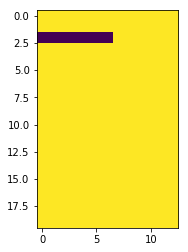

In [36]:
# 调试某个图片
filename=r'1559096708452.jpg'
c_img = cv2.imread(filename)
print(c_img.shape)
#     print(c_img.shape)
#     dirname=os.path.dirname(filename)

#     name=os.path.basename(filename)
first_name=filename.split('.')[0]

g_img = cv2.cvtColor(c_img,cv2.COLOR_BGR2GRAY)

thresh,new_img = cv2.threshold(g_img,160,255,0)
first=new_img[:,0:25]
plt.imshow(first)
first=vertical(first)
# 
print(first)
# 切开
if len(first)==1:
    l = first[0][0]
    r = first[0][1]
    first[0]=(l,int((r-l)/2+l))
    first.append((int((r-l)/2+l),r))

elif len(first)>2:
    print('len of first',len(first))
    print(first[0])
    print(first[1])
    print(first[2])
    for idx,it in enumerate(first.copy()):
        if it[1]-it[0]<4:
            first.pop(idx)

if len(first)==0:
    print('empty')
    print(first)
    
if len(first)==2:
    for idx,it in enumerate(first.copy()):
        if it[1]-it[0]<4:
            first.pop(idx)
            
if len(first)==1:
    position0=first[0][0]
    position1=first[0][1]
    if position1-position0>=13:
        first[0]=(position0,int((position1-position0)/2+position0))
        first.append((int((position1-position0)/2+position0),position1))

one=resize_img(new_img[:,first[0][0]:first[0][1]],(13,20))
plt.imshow(one)
two=resize_img(new_img[:,first[1][0]:first[1][1]],(13,20))
three=resize_img(new_img[:,30:43],(13,20))
four=resize_img(new_img[:,42:55],(13,20))
#     return one,two,three,four
# cv2.imwrite('{}-{}.jpg'.format(first_name,1),one)
# cv2.imwrite('{}-{}.jpg'.format(first_name,2),two)
# cv2.imwrite('{}-{}.jpg'.format(first_name,3),three)
# cv2.imwrite('{}-{}.jpg'.format(first_name,4),four)

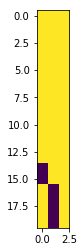

In [7]:
plt.imshow(new_img[:,19:22])

In [21]:
len(first)

2